# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [52]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [53]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [54]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [55]:
# Standardizing the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [57]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [58]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [59]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [60]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    b = 0
    w = np.zeros_like(dim)
    return w,b

In [61]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [62]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [63]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return (1/(1+np.exp(-z)))

<font color='cyan'>Grader function - 2</font>

In [64]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [65]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss = 0
    n = len(y_true)
    for i in range(n):
        loss += ( ( np.dot(y_true[i], np.log10(y_pred[i])) ) + ( np.dot((1-y_true[i]),np.log10(1-y_pred[i])) ) )
    loss = -1/n * loss
    return loss

<font color='cyan'>Grader function - 3 </font>

In [66]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [67]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = (np.dot(x,(y - sigmoid(np.dot(w,x) + b))) - (alpha/N)*w)
    return dw

<font color='cyan'>Grader function - 4 </font>

In [68]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [69]:
 def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(np.dot(w,x) + b)
    return db

<font color='cyan'>Grader function - 5 </font>

In [70]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [71]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    N = len(X_train)
    w, b = initialize_weights(X_train[0])

    # x_train_loss and x_test_loss will store the loss values at the end of each epoch
    x_train_loss = []
    x_test_loss = []

    # prev_train_loss and prev_test_loss will keep track of the loss values in the previous epoch
    prev_train_loss = 0
    prev_test_loss = 0

    # epochs_ran will be incremented each time an epoch is finished
    epochs_ran = 0

    # iterating over the number of epochs
    for i in range(epochs):
        for j in range(len(X_train)):
            # calculating the dw and db values and updating w and b values
            dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N)
            db = gradient_db(X_train[j], y_train[j], w, b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)

        # x_train_pred and x_test_pred will store the probabilities obtained using this epoch's w and b values
        x_train_pred = []
        x_test_pred = []

        # calculating and storing x_train_pred and x_test_pred values
        for k in range(len(X_train)):
            x_train_pred.append(sigmoid(np.dot(w, X_train[k])+b))

        for k in range(len(X_test)):
            x_test_pred.append(sigmoid(np.dot(w, X_test[k])+b))

        # calculating the logloss values of train and test probabilities obtained
        current_train_loss = logloss(y_train, x_train_pred)
        current_test_loss = logloss(y_test, x_test_pred)

        # storing the logloss values obtained
        x_train_loss.append(current_train_loss)
        x_test_loss.append(current_test_loss)

        # printing the informationg of this epoch
        print(f"Epoch: {i}\nTrain Loss: {current_train_loss}\nTest Loss: {current_test_loss}\nPrev Train Loss: {prev_train_loss}\nPrev Test Loss: {prev_test_loss}\n", "="*10, "\n")

        # if this is the first epoch, storing the current loss values in the prev_train_loss and prev_test_loss values
        if(i == 0):
            prev_train_loss = current_train_loss
            prev_test_loss = current_test_loss
        # if this is not the first epoch,
        else:
            # checking if the difference of train loss between current epoch and previous epoch is less than 10^-5
            if(prev_train_loss-current_train_loss < 0.00001):
                # if it is, breaking the execution
                print("No improvement in train loss")
                break
            else:
                # if it is not, then storing the current train and test losses as previous loss values and moving on to the next epoch
                prev_train_loss = current_train_loss
                prev_test_loss = current_test_loss

        # incrementing the epochs_ran value
        epochs_ran += 1
    # returing the values
    return w,b,x_train_loss,x_test_loss, epochs_ran

In [72]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,x_train_loss,x_test_loss,epochs_ran = train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

Epoch: 0
Train Loss: 0.17545748442854608
Test Loss: 0.1759547442321374
Prev Train Loss: 0
Prev Test Loss: 0

Epoch: 1
Train Loss: 0.16867157050333045
Test Loss: 0.16939931358951013
Prev Train Loss: 0.17545748442854608
Prev Test Loss: 0.1759547442321374

Epoch: 2
Train Loss: 0.1663916799246292
Test Loss: 0.16720591194885745
Prev Train Loss: 0.16867157050333045
Prev Test Loss: 0.16939931358951013

Epoch: 3
Train Loss: 0.16536827537403162
Test Loss: 0.16621717799334956
Prev Train Loss: 0.1663916799246292
Prev Test Loss: 0.16720591194885745

Epoch: 4
Train Loss: 0.16485707459547086
Test Loss: 0.16571959463978406
Prev Train Loss: 0.16536827537403162
Prev Test Loss: 0.16621717799334956

Epoch: 5
Train Loss: 0.16458820012928269
Test Loss: 0.16545557095508645
Prev Train Loss: 0.16485707459547086
Prev Test Loss: 0.16571959463978406

Epoch: 6
Train Loss: 0.16444271323364384
Test Loss: 0.16531135020799506
Prev Train Loss: 0.16458820012928269
Prev Test Loss: 0.16545557095508645

Epoch: 7
Train Los

<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [73]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00268543,  0.00639463,  0.00155456, -0.00331533, -0.00787491,
          0.0071592 ,  0.00715886,  0.00317169,  0.01037639, -0.00928916,
         -0.00028492, -0.00318369,  0.00024727,  0.00040174, -0.00015886]]),
 array([-0.01543912]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

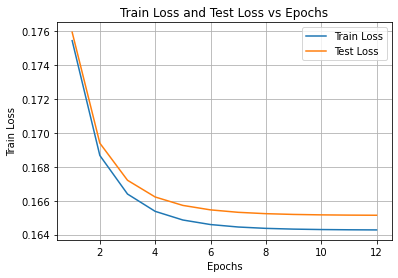

In [74]:
# Plotting epochs vs loss for train and test
import matplotlib.pyplot as plt
a = np.arange(1,epochs_ran+2)
fig, ax = plt.subplots()
ax.plot(a, x_train_loss, label="Train Loss")
ax.plot(a, x_test_loss, label="Test Loss")
ax.set(xlabel='Epochs', ylabel='Train Loss', title='Train Loss and Test Loss vs Epochs')
ax.grid()
ax.legend()
plt.show()

In [75]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9542933333333333
0.95192
